In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'C:\Tugas4_A_11801\credit_card.csv')
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:

print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [6]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

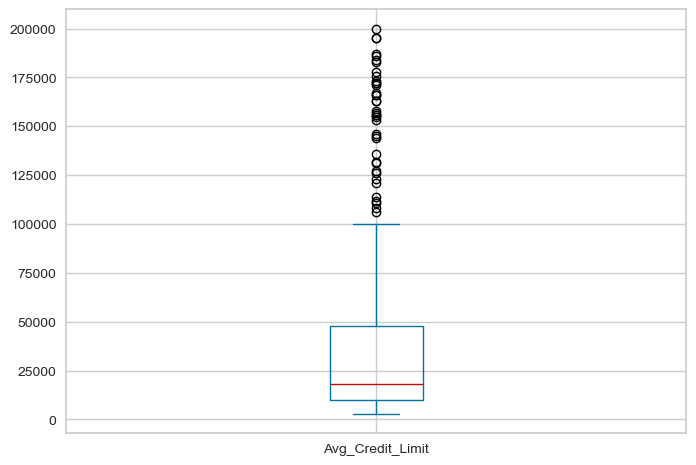

In [7]:

df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier 660
Jumlah data sesudah dibuang outlier 621


<Axes: >

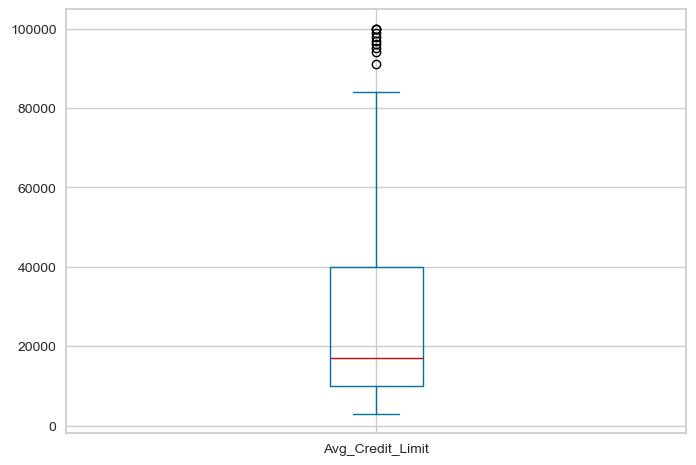

In [8]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    for col_name in list(data_frame.columns):
        if is_numeric_dtype(data_frame[kolom_outlier]):
            q1 = data_frame[kolom_outlier].quantile(0.25)
            q3 = data_frame[kolom_outlier].quantile(0.75)

            iqr = q3-q1
            batas_atas = q3 + (1.5 * iqr)
            batas_bawah = q1 - ( 1.5 * iqr)

            df_out = data_frame.loc[(data_frame[kolom_outlier] >= batas_bawah ) & (data_frame[kolom_outlier] <= batas_atas)]
    return df_out

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')
print("Jumlah data sebelum dibuang outlier", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier", data_bersih.shape[0])
data_bersih['Avg_Credit_Limit'].plot(kind='box')

  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


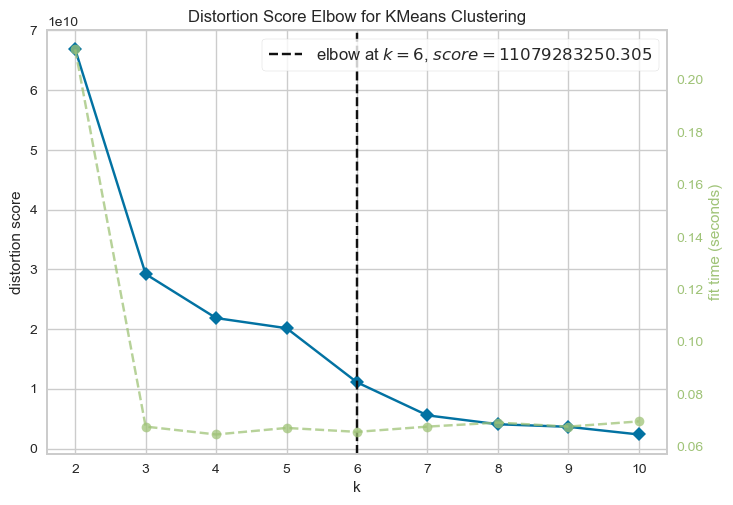

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=1)
vis = KElbowVisualizer(kMeansC, k=(2, 11))

vis.fit(data_bersih)

vis.show()

Silhouette Score for  2  clusters : 0.7254150167909509
Silhouette Score for  3  clusters : 0.7077390094589705
Silhouette Score for  4  clusters : 0.5866654641248105
Silhouette Score for  5  clusters : 0.5432091138136126
Silhouette Score for  6  clusters : 0.5561748553700107
Silhouette Score for  7  clusters : 0.5988823996531906
Silhouette Score for  8  clusters : 0.5883936959989691
Silhouette Score for  9  clusters : 0.583163130358938
Silhouette Score for  10  clusters : 0.596720055498535


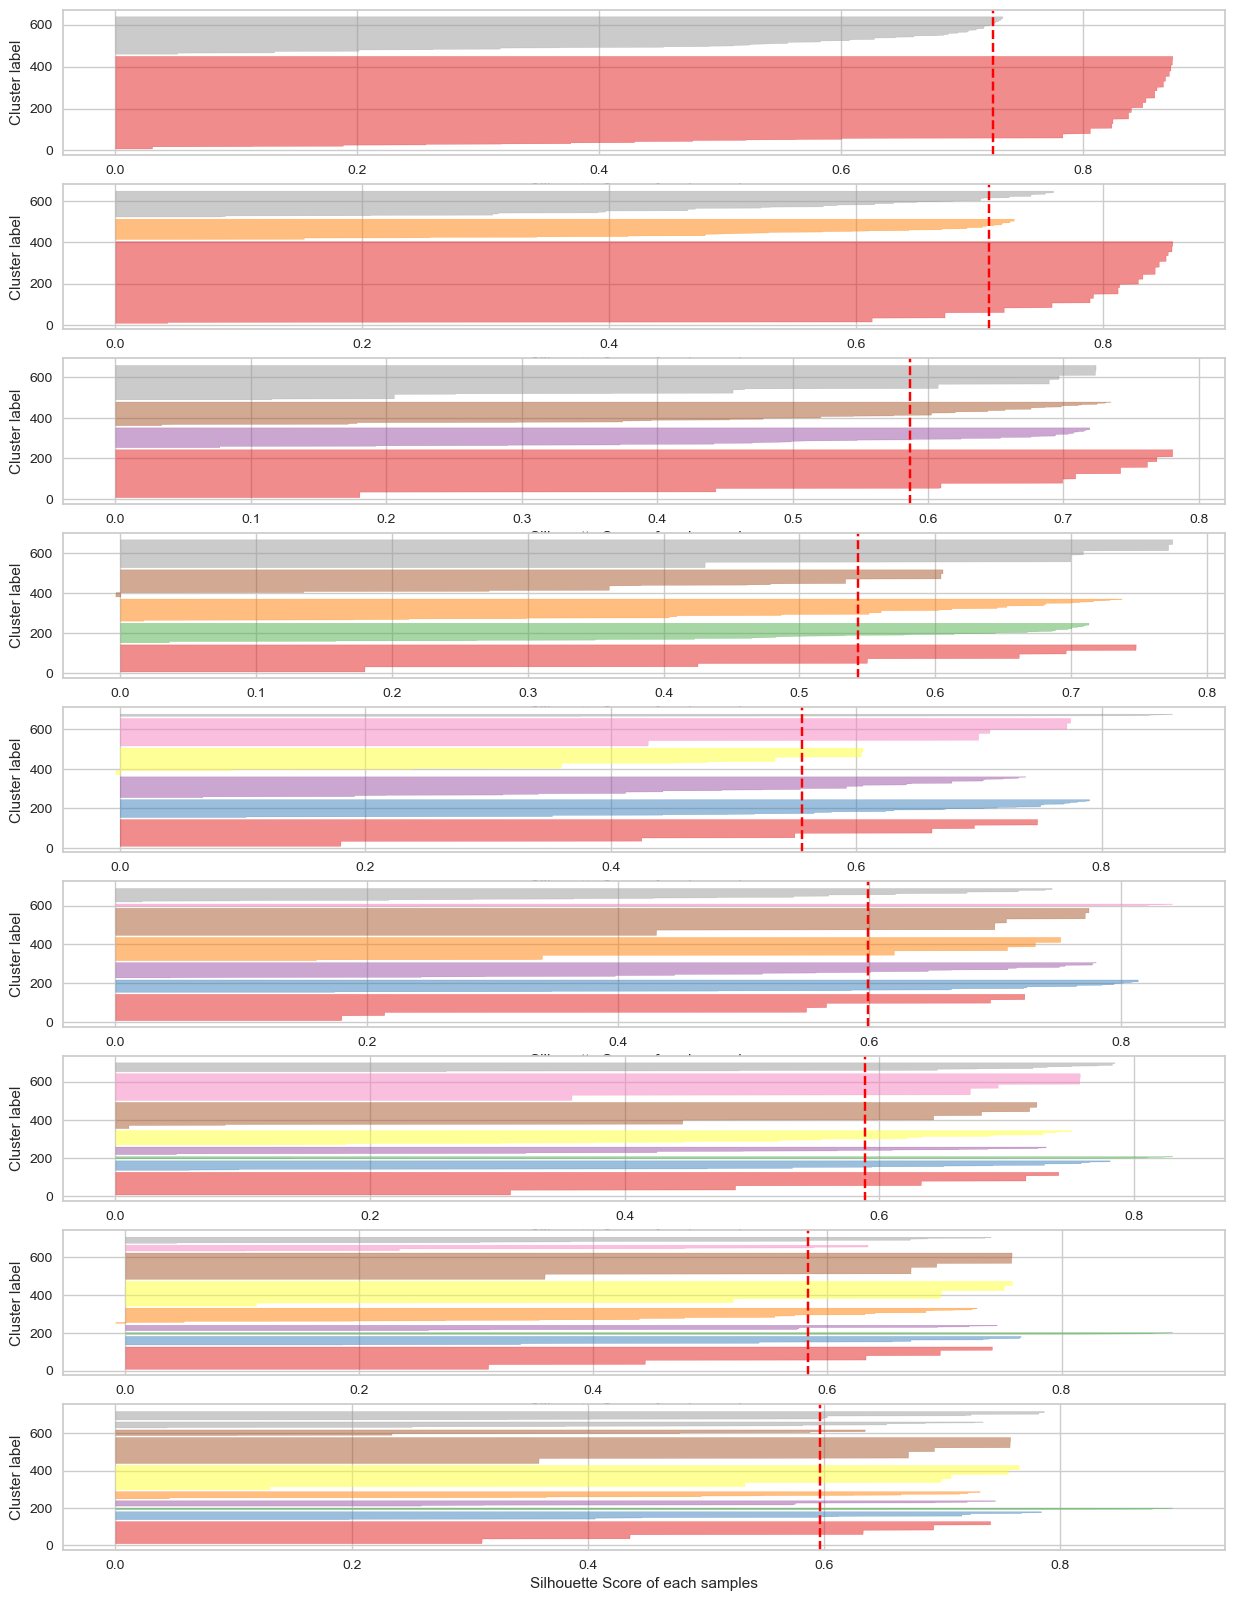

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=1)
    KM_clusters=kMeansC.fit_predict(data_bersih)
    print("Silhouette Score for ", k, " clusters :", silhouette_score(data_bersih, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(kMeansC, ax=ax[k-2])
    sil_vis.fit(data_bersih)
    
    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [25]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

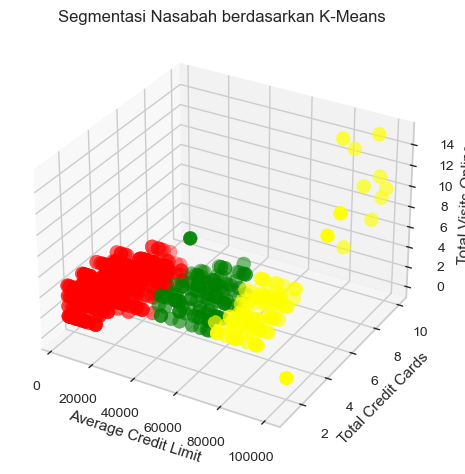

Silhouette Score K-Means: 0.708 


In [27]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=1)
K_Clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d' )

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=[cluster_colors[i] for i in K_Clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K-Means: %0.3f " % silhouette_score(data_bersih, K_Clusters))


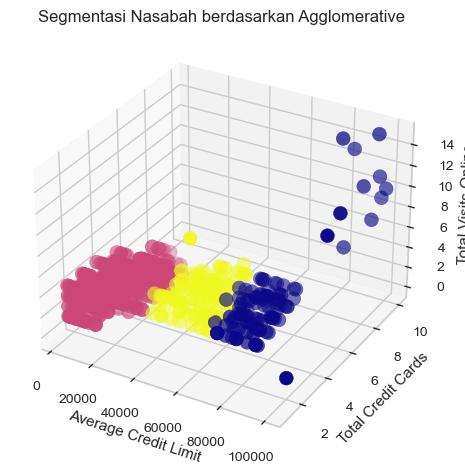

Silhouette Score K-Means: 0.705 


In [29]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax. scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f " % silhouette_score(data_bersih, AGG_clusters))

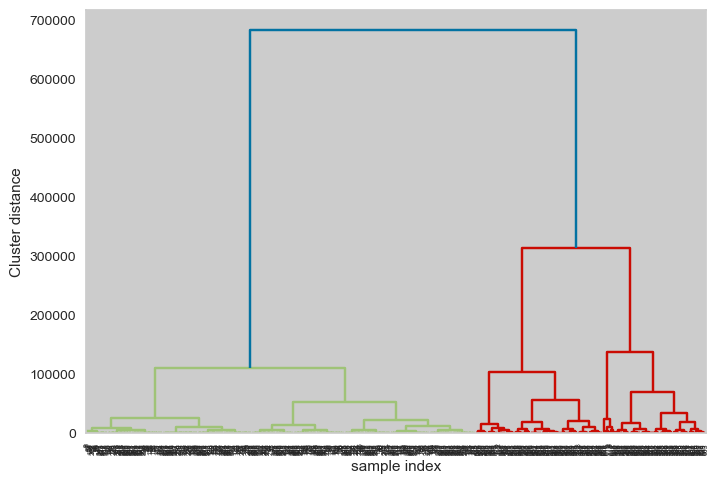

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("sample index")
plt.ylabel("Cluster distance")
plt.show()

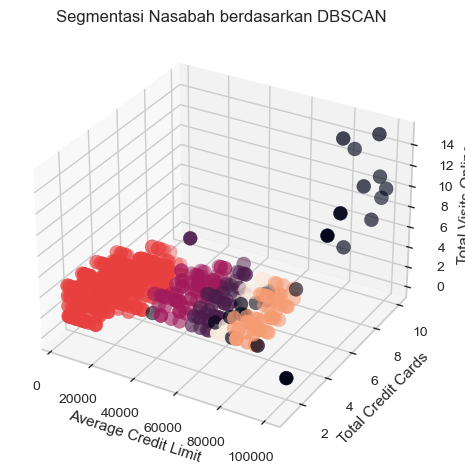

Silhouette Score DBSCAN: 0.657 


In [31]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score DBSCAN: %0.3f " % silhouette_score(data_bersih, DBSC_clusters))

In [32]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump(kmeans, r)
    
with open('AGG_model.pkl', 'wb') as r:
    pickle.dump(AGG, r)
with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump(DBSC, r)
    
print("Model berhasil disimpan")

Model berhasil disimpan
